# Lec 11.2 Machine learning 2
# Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
Here is the whole code below. We are going to break this example down

### Notes 
cluster is descriptive, classification is prescriptive. Clusters make classes when there are none already, when you have a group of things, how do you relate the things in the group to eachotehr. 

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


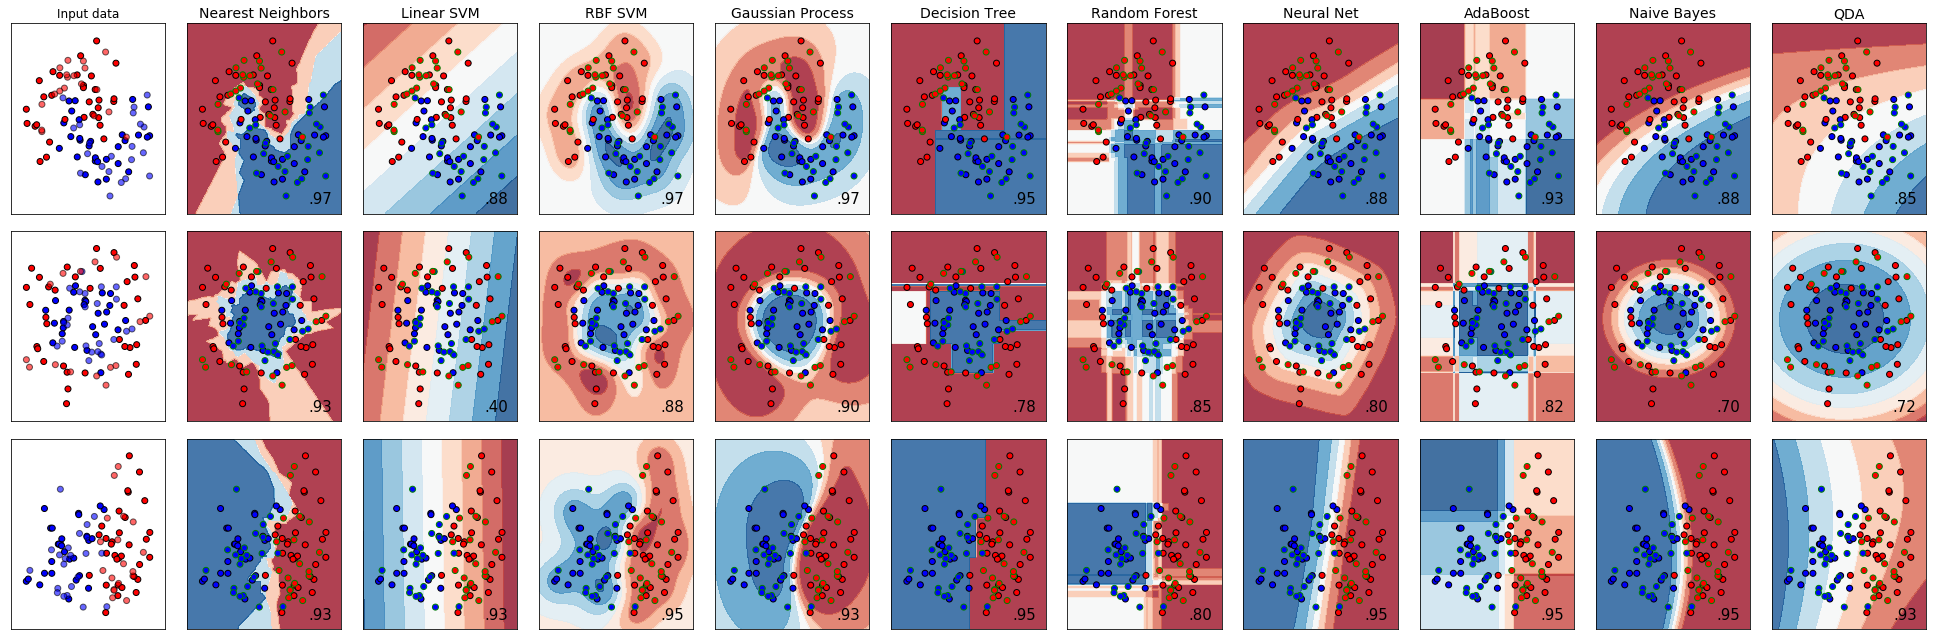

In [3]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data an pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# all the classifiers they will use
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

In [2]:
# so they loaded all the packages of sklearn separately

In [4]:
# the red and blue show the probability that the dot will end up in either color

In [5]:
#each picture is a different method of machine learning interpreting the same data

In [6]:
h = .02  # step size in the mesh

# create a string list of all the cassifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [7]:
# create a function list of all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Part 1: Make some datasets to classify
The example uses three types of data, linearly separable, moons and circles
# D1. Linearly separable (side by side data)

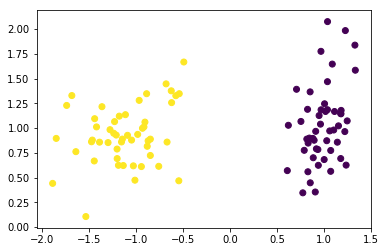

In [8]:
# make some data to play with (this is from sklearn.datasets, loaded above)
#gives you all these options of how to make the data, multiple features etc
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [11]:
#these are too separate so we will make it harder for the algorithm to solve with random noise

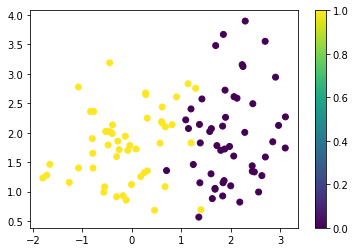

In [12]:
# add som noise to these so they smoosh together
X_old = np.copy(X)
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()


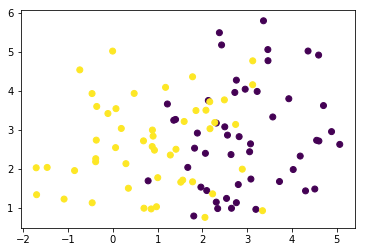

In [13]:
plt.scatter(X[:,0],X[:,1], c = y)

# E1. What happens if you use X_old = X instead of X_old = np.copy(X)?

that would be redundant, you want to keep making new, randomer data.


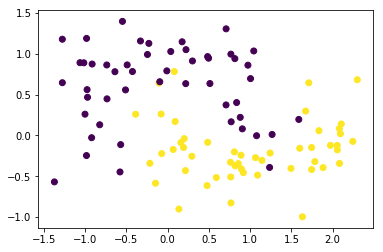

In [14]:
# moons 
X,y = make_moons(noise=0.3, random_state=12)
plt.scatter(X[:,0],X[:,1], c = y)

# E2. What happens to the make_moons data if you change the noise and random state? Why do you think they picked noise = 0.3?


the pattern changes if you change random state, and the messiness/mixing of the data changes if you change noise. a noise .3 is messy but not too messy

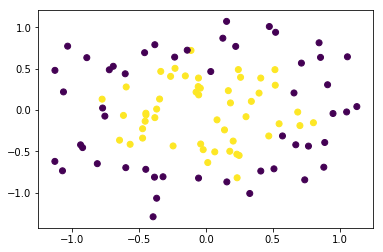

In [15]:
# D3 Circles

# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)


# E2. Play around with the options for make_circles. What does factor do?¶

factor has to be between zero and 1, it changes the size of the inner circle vs the outer circle. as you get closer to 1 the inner circle encroaches on the outer circle

# Part 2: Big double for loop

The next part of the code has a double for loop that:
Loops over the datasets
#iterate over datasets
for ds_cnt, ds in enumerate(datasets):

    Loops over the classifiers
    # iterate over classifiers
    for name, clf in zip(names, classifiers):


Let's break this down, and start with one dataset and apply a number of classifiers to it


### Using first dataset (moons) and first estimator
FIrst we preproccess
preprocess dataset, split into training and test part
scale the data

In [17]:
# put the three types of datasets together in one array
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]


In [55]:
# get the first dataset, which is moons
X, y = datasets[0]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(X)

# E3 make a plot with two subplots, showing the scaled and unscaled data next to each other. How are they different?

IndexError: index 2 is out of bounds for axis 0 with size 2

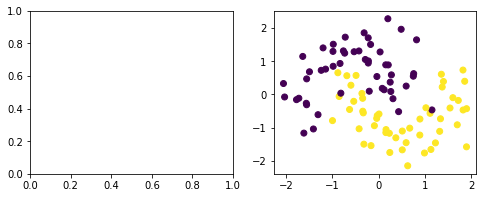

In [69]:
a, b = make_moons(noise=0.3, random_state=12)
X, y = datasets[0]
X = StandardScaler().fit_transform(X)

fig, ax = plt.subplots(figsize=(8,3), ncols=2, sharex=False, sharey=False)

im= ax[1].scatter(X[:,0],X[:,1], c= y)


im= ax[2].scatter(a[:,0],a[:,1], c= b)

In [70]:
# you can't get them on the same axis because the unscaled data is not scaled

In [19]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

# E4 What percentage of the data is used for training here?

60%

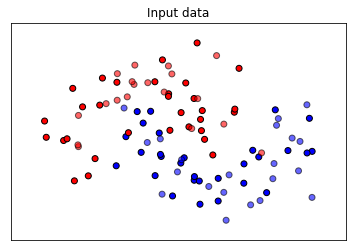

In [21]:
# plot the data
# make the mesh over the whole space
# after classification we will feed that mesh in to make a prediction

#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points........alpha makes transparency
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1

Note the testing data is the more transparent set, and the training data is darker
Now we are ready to apply classifiers
Remember we are doing the following:
classifiers = [
KNeighborsClassifier(3),

SVC(kernel="linear", C=0.025),

SVC(gamma=2, C=1),
GaussianProcessClassifier(1.0 * RBF(1.0)),

DecisionTreeClassifier(max_depth=5),

RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),

MLPClassifier(alpha=1),

AdaBoostClassifier(),

GaussianNB(),

QuadraticDiscriminantAnalysis()]

# Nearest neighbors
Basically this method looks at k number of nearest neighbors, using some distance metric, and predicts which class a point is in based on the type of thing those neighbors are.
intro https://www.python-course.eu/k_nearest_neighbor_classifier.php
see https://scikit-learn.org/stable/modules/neighbors.html
and https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
actual help files:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [29]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

# clf.fit means take your training data, apply the classifyer
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [23]:
name

'Nearest Neighbors'

In [28]:
clf
# clf means classifier
# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
score

0.975


Next we will plot the decision boundary using the mesh we generated. Basically this is asking, for each point on the plane, which group would I be in, red or blue?

In [27]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# E5 what does the xx.ravel() bit of code do?

makes a z which makes the colormap behind the points

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

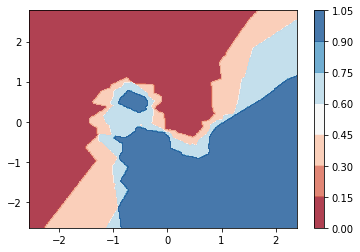

In [30]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

In [31]:
# probability of blue space or red space

# E6 what do the light blue and peach colors represent?

light blue and peach is the region where you have less predictability of red tribe or blue tribe


Now we will add in the training and testing points, and see how well the method did to predict the latter

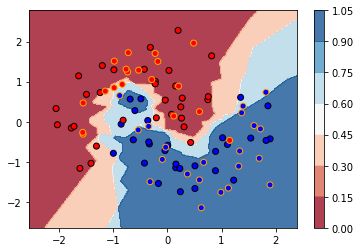

In [32]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)


# E7 How well did the method do? Are their outliers in either class? Is it reasonable that this method did not predict those, given the training dataset?

it did pretty good, there is a testing set outlier, the orange spot in the blue space

# E8 Using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.¶

In [71]:
### I'm going to use the Random FOrest

In [84]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 5

name2 = names[5]
clf2 = classifiers[5]

clf2.fit(X_train, y_train)
score2 = clf2.score(X_test, y_test)

In [85]:
name2

'Random Forest'

In [86]:
clf2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
# random forest basically bifurcates (makes trees) of all the possible two pair groups of similarities and used bootstrapped aggregation to create even more imaginary datasets to work on

In [88]:
score2

0.95

In [89]:
# it has the same score as the knearest neighbors

In [91]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf2, "decision_function"):
    Z2 = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z2 = clf2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

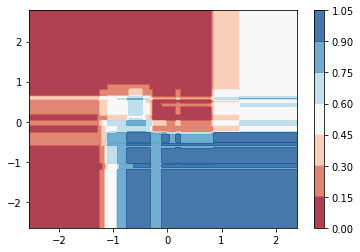

In [92]:
# Put the result into a color plot
Z2 = Z2.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z2, cmap=cm, alpha=.8)
plt.colorbar()

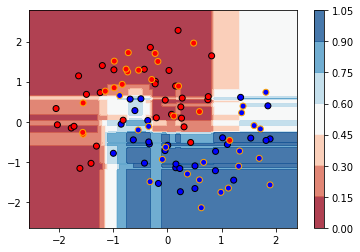

In [93]:
# Put the result into a color plot
Z2 = Z2.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z2, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

# how did Random FOrest do?

Random Forest put the same orange datapoint in the blue that Knearest neighbors did. Random Forest Actually looks a lot like Knearest neighbors, with the swirl of blue and red only with squares. it even has the same light spot in the middle of the swirl as well as the top right quadrant


# E9 Again, using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [94]:
# I'm going to do Naive Bayes with Dataset [1]

In [112]:
X1, y1 = datasets[1]
X1 = StandardScaler().fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1, y1, test_size=.4, random_state=42)

c = 8

name3 = names[8]
clf3 = classifiers[8]

clf3.fit(X1_train, y1_train)
score3 = clf3.score(X1_test, y1_test)

In [114]:
name3

'Naive Bayes'

In [115]:
clf3

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
score3

0.7

Naive Bayes assumes that every pair of features are independant in a dataset, it calculates the probability of the connection of a feature with a target variable and then selects the feature with the highest probability.

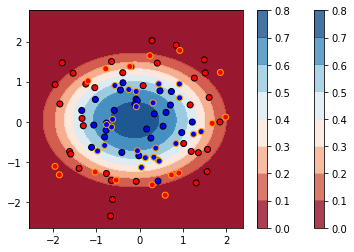

In [113]:
if hasattr(clf3, "decision_function"):
    Z3 = clf3.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z3 = clf3.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
Z3 = Z3.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z3, cmap=cm, alpha=.8)
plt.colorbar()
# Put the result into a color plot
Z3 = Z3.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z3, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X1_test[:, 0], X1_test[:, 1], c=y1_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

# How did your method do

THis method did accurately show that blue is mostly the middle and red is mostly the outside, it has one major blue outlier and not any major red outliers

# E10-11 pick a few more to go through

In [95]:
c = 8

name3 = names[8]
clf3 = classifiers[8]

clf3.fit(X_train, y_train)
score3 = clf3.score(X_test, y_test)

In [96]:
name3

'Naive Bayes'

In [97]:
clf3

GaussianNB(priors=None, var_smoothing=1e-09)

Naive Bayes assumes that every pair of features are independant in a dataset, it calculates the probability of the connection of a feature with a target variable and then selects the feature with the highest probability.

In [98]:
score3

0.875

The naive bayes score is lower than the previous two treatments but we need t olook at the plot to really see the fit

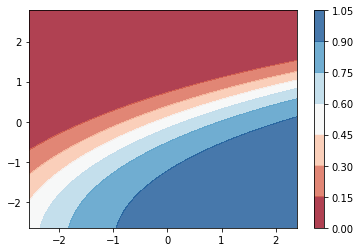

In [106]:
if hasattr(clf3, "decision_function"):
    Z3 = clf3.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z3 = clf3.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
Z3 = Z3.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z3, cmap=cm, alpha=.8)
plt.colorbar()

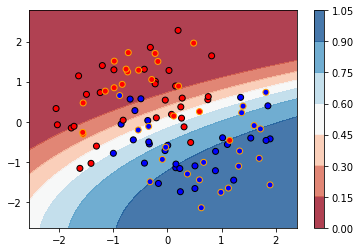

In [100]:
# Put the result into a color plot
Z3 = Z3.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z3, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

# How did this method do?

there are more outliers in the red zone as well with this method. It seemed to just generalize the area of most mixing as neutral rather than find a contour of the two groups of data


# E10-11 pick a few more to go through

I'm going to try QDA

In [101]:
c = 9

name4 = names[9]
clf4 = classifiers[9]

clf4.fit(X_train, y_train)
score4 = clf4.score(X_test, y_test)

In [103]:
name4

'QDA'

In [104]:
clf4

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

the quadratic discriminant analysis fits a gaussian density to each class and then creates a quadratic decision boundary, generated by fitting class conditional densities to the data using Bayes' (assumed independance) rule

In [105]:
score4

0.85

this is the same score as the Naive Bayes

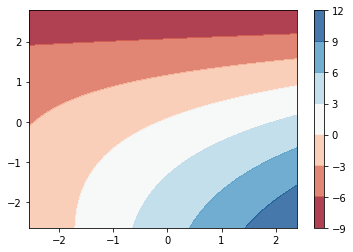

In [107]:
if hasattr(clf4, "decision_function"):
    Z4 = clf4.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z4 = clf4.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
Z4 = Z4.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z4, cmap=cm, alpha=.8)
plt.colorbar()

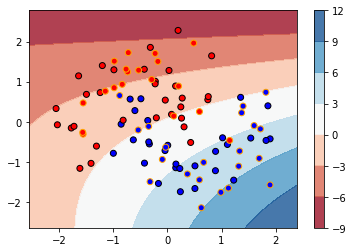

In [108]:
# Put the result into a color plot
Z4 = Z4.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z4, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

# How well did your method do?

The QDA looked like the only method that had the least amount of orange outliers in the blue zone, but really there is just a lower confidence level for all the blue pieces. Overall there are more blue outliers in the red zone now, so it really shifted everything over and is really less apparantly fitting than the naive bayes